# Part 3: Hidden Markov Models

## Part 3.4: Task-3

## Part 3.4.1: Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [3]:
rolls = np.load("../rolls.npy")

## Part 3.4.2: Part 1

In [4]:
np.random.seed(13)

train_rolls = rolls[:rolls.shape[0] // 2]
val_rolls   = rolls[rolls.shape[0] // 2:]
print(train_rolls.shape)
print(train_rolls)

(25000, 1)
[[2]
 [0]
 [3]
 ...
 [3]
 [0]
 [5]]


In [5]:
# I used the following ChatGPT prompt to generate the below code:
"""
I need a function (preferably numpy) to sample the probabilities of each face of a loaded die.
So, my requirements would be a function that generates 6 numbers that sum to 1
"""
def generate_die_probabilities():
    rand_numbers = np.random.rand(5)
    rand_numbers.sort()

    intervals = np.concatenate([[0], rand_numbers, [1]])
    probabilities = np.diff(intervals)

    return probabilities

### This file creation is to ensure reproducibility across different tests

In [7]:
num_dists  = 100
prob_dists = np.zeros((num_dists, 6))
for i in range(num_dists):
    prob_dists[i, :] = generate_die_probabilities()
np.save("probs.npy", prob_dists)

## Part 3.4.2.1: Best HMM model

In [6]:
best_rolls_score = -np.inf
best_rolls_model = None
best_rolls_prob  = None 

prob_dists = np.load("probs.npy")

for prob_dist in prob_dists:
    loaded_prob = prob_dist
    
    rolls_model = hmm.CategoricalHMM(n_components=2, random_state=13, init_params='')

    rolls_model.startprob_ = np.array([1, 0])
    rolls_model.transmat_  = np.array([[0.95, 0.05], 
                                 [0.05, 0.95]])
    
    rolls_model.emissionprob_ = np.array([np.full((6,), 1 / 6),
                                    loaded_prob])
    
    rolls_model.fit(train_rolls)

    validation_score = rolls_model.score(val_rolls)

    if validation_score > best_rolls_score:
        best_rolls_score = validation_score
        best_rolls_model = rolls_model
        best_rolls_prob  = loaded_prob

        print(f"New best score: {best_rolls_score}")
        print("New best probability distribution of the loaded die")
        print(loaded_prob)
        print(rolls_model.emissionprob_)
        print()

print("===================================")
print(f"Best score: {best_rolls_score}")
print("Best probability distribution")
print(best_rolls_prob)
print("===================================")

New best score: -43091.79136646804
New best probability distribution of the loaded die
[0.06094814 0.15803518 0.03592748 0.28601835 0.16173267 0.29733818]
[[0.15722816 0.14698323 0.15911534 0.14952894 0.15212602 0.23501833]
 [0.09880805 0.11786691 0.09605527 0.10939678 0.11504099 0.462832  ]]

New best score: -43088.01304007542
New best probability distribution of the loaded die
[0.05666669 0.24887628 0.1589449  0.04079692 0.14760128 0.34711392]
[[0.15877568 0.14764857 0.15677392 0.15548014 0.15524339 0.22607831]
 [0.10211796 0.11969952 0.10655701 0.1032282  0.11345471 0.45494259]]

New best score: -43085.975080860284
New best probability distribution of the loaded die
[0.01701729 0.19957999 0.09883216 0.17205573 0.04462873 0.46788609]
[[0.15694384 0.14599584 0.15304106 0.14905166 0.15472731 0.24024029]
 [0.08532709 0.11349946 0.09753966 0.10091992 0.09874861 0.50396526]]

New best score: -43082.72486120079
New best probability distribution of the loaded die
[0.07313277 0.03608097 0.10

## Part 3.4.2.2: Switching sequence

In [7]:
switches = best_rolls_model.predict(rolls)
print("The sequnce of switching between the dice is as follows:")
print(switches)
print(np.where(switches == 1))

The sequnce of switching between the dice is as follows:
[0 0 0 ... 0 0 0]
(array([  337,   338,   339, ..., 49635, 49636, 49637]),)


## Part 3.4.2.3: Generated States

[    0     1     2 ... 49997 49998 49999]
0


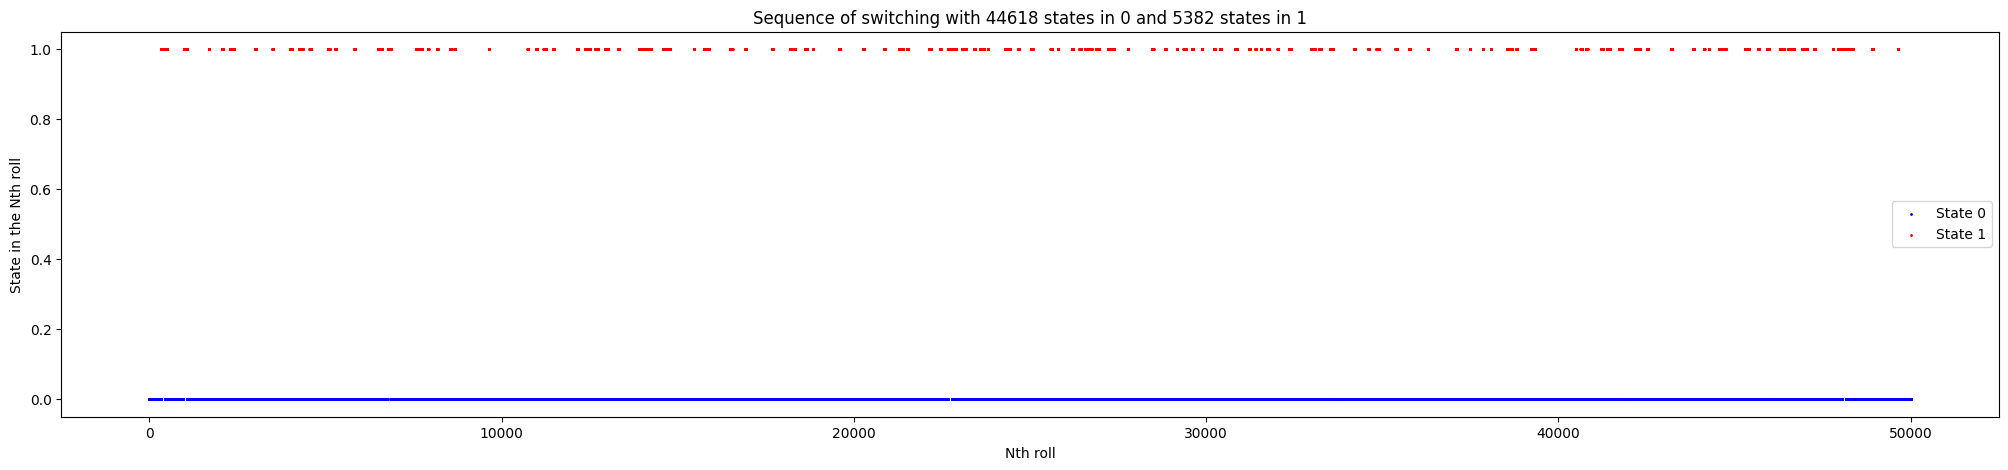

In [8]:
where_zero = np.where(switches == 0)[0]
where_one  = np.where(switches == 1)[0]
print(where_zero)
print(where_zero[0])

plt.figure(figsize=(25, 5))
plt.scatter(where_zero, np.zeros(len(where_zero)), s=1, c='blue', label="State 0")
plt.scatter(where_one,  np.ones(len(where_one)),   s=1, c='red', label="State 1")
plt.title(f"Sequence of switching with {len(where_zero)} states in 0 and {len(where_one)} states in 1")
plt.xlabel("Nth roll")
plt.ylabel("State in the Nth roll")
plt.legend()
plt.show()

## Part 3.4.2.4: Corresponding Problem of HMMs
- This corresponds to the `Decoding` problem of HMMs
- The `Decoding` problem deals with most probable sequence of hidden states given HMM parameters and observation sequence
- More specifically, the `Viterbi algorithm` is used to solve this problem
- Here, we are trying to find the most likely sequence of switching between the fair and loaded dice
- We have set an initial estimate of the model parameters and we also have the observation sequence and so, we are aiming to find the most likely sequence and so, this nicely fits into the `Decoding` problem of HMMs

## Part 3.4.3: Part 2

## Part 3.4.3.1: Transition matrix

In [9]:
print(f"Probability of going from fair dice to loaded one: {best_rolls_model.transmat_[0, 1]}")
print(f"Probability of going from loaded dice to fair one: {best_rolls_model.transmat_[1, 0]}")

Probability of going from fair dice to loaded one: 0.04733243534841839
Probability of going from loaded dice to fair one: 0.165512839107243


## Part 3.4.3.2: Corresponding Problem of HMMs
- This corresponds to the `Learning` problem of HMMs
- The `Learning` problem deals with the estimation of HMM parameters such that they maximize the likelihood of the observed data given observation sequence
- More specifically, the `Baum-Welch algorithm` is used to solve this problem
- Here, we are trying to find the transition matrix that best describes the observed data 
- We have the observation sequence and so, this belongs to the `Learning` problem of HMMs

## Part 3.4.4: Part 3

## Part 3.4.4.1: Loaded die probabilities

In [10]:
print("The probability distribution of the loaded die is:")
print(best_rolls_model.emissionprob_[1])

The probability distribution of the loaded die is:
[0.0978843  0.10624034 0.06909639 0.09218765 0.09847595 0.53611537]


## Part 3.4.4.2: Corresponding Problem of HMMs
- This corresponds to the `Learning` problem of HMMs
- The `Learning` problem deals with the estimation of HMM parameters such that they maximize the likelihood of the observed data given observation sequence
- More specifically, the `Baum-Welch algorithm` is used to solve this problem
- Here, we are trying to find the emission probability vector that best describes the observed data
- We have the observation sequence and so, this belongs to the `Learning` problem of HMMs

## Part 3.5: Task-4

In [11]:
runs = np.load("./Data/HMM/runs.npy")
continuous_runs = np.where(runs == 6, 5, runs)

## Part 3.5.1: Optimal HMM model metrics

In [12]:
runs_model = hmm.CategoricalHMM(n_components=2, random_state=13, init_params='')
runs_model.transmat_ = np.array([[0.7, 0.3],
                            [0.3, 0.7]])

runs_model.fit(continuous_runs)

optimal_transmat       = runs_model.transmat_
optimal_emission_prob  = runs_model.emissionprob_
optimal_start_prob     = runs_model.startprob_

print("The optimal transition matrix is:")
print(optimal_transmat)
print()
print("The optimal emission probability is:")
print(optimal_emission_prob)
print()
print("The optimal start probability is:")
print(optimal_start_prob)

The optimal transition matrix is:
[[0.72822223 0.27177777]
 [0.42099112 0.57900888]]

The optimal emission probability is:
[[0.10906364 0.09369237 0.1403522  0.0477004  0.39396409 0.2152273 ]
 [0.15044751 0.36567297 0.23376156 0.04880387 0.03662338 0.1646907 ]]

The optimal start probability is:
[3.14092467e-06 9.99996859e-01]


- From the above emission probability distribution, we can conclude that the first player, i.e., state `0` is `Rohit` as the distribution is more skewed towards higher runs and the second player, i.e., state `1` is `Kohli` as this distribution is more skewed towards the lower runs

## Part 3.5.2: Player prediction

In [13]:
states = runs_model.predict(continuous_runs)
first_state, last_state = states[0], states[-1]

first_player = "Rohit" if first_state == 0 else "Virat"
last_player  = "Rohit" if last_state  == 0 else "Virat"

print(f"{first_player} played the first ball")
print(f"{last_player} played the last  ball")

Virat played the first ball
Rohit played the last  ball
